In [90]:
import torch.nn.functional as F

from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [34]:
train_data = FashionMNIST('datasets/', download=True, transform=ToTensor(), train=True)
test_data = FashionMNIST('datasets/', download=True, transform=ToTensor(), train=False)

In [35]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [91]:
class TinyModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 3, 3, bias=False)
        self.conv2 = nn.Conv2d(3, 12, 3, bias=False)
        self.fc1 = nn.Linear(6912, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = torch.flatten(x, start_dim=1)
#         print(x.shape)
        x = self.fc1(x)
        return x

In [92]:
model = TinyModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

model.train()

for epoch in range(10):
    total_correct = 0
    total_data = 0
    running_loss = 0
    for batch, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        
        out = model(X)
        loss = loss_fn(out, y)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
        y_pred = torch.argmax(out, dim=1)
        total_correct += torch.sum(y_pred == y)
        total_data += y.shape[0]
    print(f"acc:{total_correct / total_data * 100}, loss: {running_loss}")
    print(total_data, total_correct)

acc:80.63500213623047, loss: 530.6796344071627
60000 tensor(48381)
acc:87.05166625976562, loss: 351.14498350024223
60000 tensor(52231)
acc:88.57333374023438, loss: 310.5926681160927
60000 tensor(53144)
acc:89.39167022705078, loss: 283.42521400749683
60000 tensor(53635)
acc:90.34166717529297, loss: 258.44903180003166
60000 tensor(54205)
acc:90.93499755859375, loss: 241.90007883310318
60000 tensor(54561)
acc:91.54499816894531, loss: 224.68735794723034
60000 tensor(54927)
acc:91.96666717529297, loss: 214.2470863237977
60000 tensor(55180)
acc:92.37833404541016, loss: 200.66003990918398
60000 tensor(55427)
acc:92.92832946777344, loss: 188.4079111777246
60000 tensor(55757)


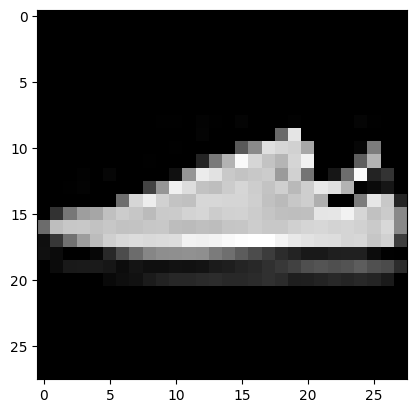

In [21]:
train_data[0]
plt.imshow(train_data[6][0],cmap='gray')